In [1]:
import pandas as pd


In [2]:
dataset = pd.read_csv('/content/Training.csv')


In [3]:
dataset.columns = dataset.columns.str.strip().str.lower()

In [4]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [5]:
dataset.shape

(4920, 133)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
x = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

#encoding
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [8]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np

#create dictionary to store models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

#loop through the models, train, test, print results
for model_name, model in models.items():
  #train model
    model.fit(x_train, y_train)
    #test model
    y_pred = model.predict(x_test)
    #calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    #calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Confusion Matrix: \n{cm}")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")

Random Forest Accuracy: 1.0
Random Forest Confusion Matrix: 
[[24  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0 22]]
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 27,  0, ...,  0,  0,  0],
 [ 0,  0, 18, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 33,  0],
 [ 0,  0,  0, ...,  0,  0, 22]]


Gradient Boosting Accuracy: 1.0
Gradient Boosting Confusion Matrix: 
[[24  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0 22]]
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 27,  0, ...,  0,  0,  0],
 [ 0,  0, 18, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 33,  0],
 [ 0,  0,  0, ...,  0,  0, 22]]


SVM Accuracy: 1.0
SVM Confusion Matrix: 
[[24  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 .

In [9]:
#selecting svc
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [10]:
#save svc
import pickle
pickle.dump(svc, open('model.pkl', 'wb'))

In [11]:
#load model
svc = pickle.load(open('model.pkl', 'rb'))

In [12]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(svc, pickle_out)
pickle_out.close()

In [13]:
#test 1
print("predicted disease :", svc.predict(x_test.iloc[0].values.reshape(1, -1)))
print("actual disease :", y_test[0])

predicted disease : [40]
actual disease : 40


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
#test 2
print("predicted disease :", svc.predict(x_test.iloc[100].values.reshape(1, -1)))
print("actual disease :", y_test[100])

predicted disease : [39]
actual disease : 39


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [15]:
sym_des = pd.read_csv('/content/symtoms_df.csv')
precautions = pd.read_csv('/content/precautions_df.csv')
workout = pd.read_csv('/content/workout_df.csv')
description = pd.read_csv('/content/description.csv')
medications = pd.read_csv('/content/medications.csv')
diets = pd.read_csv('/content/diets.csv')

In [16]:
#helper functions
def helper(dis):
  desc = description[description['Disease'] == predicted_disease]['Description']
  desc = " ".join([w for w in desc])

  pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3']]
  pre = [col for col in pre.values]

  med = medications[medications['Disease']==dis]['Medication']
  med = [med for med in med.values]

  die = diets[diets['Disease']==dis]['Diet']
  die = [die for die in die.values]

  wrkout = workout[workout['Disease']==dis]['workout']


  return desc, pre, med, die, wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [17]:
#test 1
#split the user's input into a list of symptoms (assuring they are comma seperated)
symptoms = input("Enter your symptoms....")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# remove any extra characters, if any
user_symptoms = [symptoms.strip("[]' ") for symptoms in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=========predicted disease=========")
print(predicted_disease)
print("=======description========")
print(desc)
print("=======precautions=======")
i = 1
for p_i in pre[0]:
  print(i, ": ", p_i)
  i += 1

print("=======medications=======")
for m_i in med:
  print(i,": ", m_i)
  i += 1

print("=======diets=======")
for d_i in die:
  print(i, ": ", d_i)
  i += 1

print("=======workout=======")
for w_i in wrkout:
  print(i, ": ", w_i)
  i += 1



Enter your symptoms....itching, skin_rash, stomach_pain
=========predicted disease=========
Drug Reaction
=======description========
Drug Reaction occurs when the body reacts adversely to a medication.
=======precautions=======
1 :  stop irritation
2 :  consult nearest hospital
3 :  stop taking drug
=======medications=======
4 :  ['Antihistamines', 'Epinephrine', 'Corticosteroids', 'Antibiotics', 'Antifungal Cream']
=======diets=======
5 :  ['Antihistamine Diet', 'Omega-3-rich foods', 'Vitamin C-rich foods', 'Quercetin-rich foods', 'Probiotics']
=======workout=======
6 :  Discontinue offending medication
7 :  Stay hydrated
8 :  Include anti-inflammatory foods
9 :  Consume antioxidants
10 :  Avoid trigger foods
11 :  Include omega-3 fatty acids
12 :  Limit caffeine and alcohol
13 :  Stay hydrated
14 :  Eat a balanced diet
15 :  Consult a healthcare professional


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [18]:
symptoms = input("Enter your symptoms....")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# remove any extra characters, if any
user_symptoms = [symptoms.strip("[]' ") for symptoms in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=========predicted disease=========")
print(predicted_disease)
print("=======description========")
print(desc)
print("=======precautions=======")
i = 1
for p_i in pre[0]:
  print(i, ": ", p_i)
  i += 1

print("=======medications=======")
for m_i in med:
  print(i,": ", m_i)
  i += 1

print("=======diets=======")
for d_i in die:
  print(i, ": ", d_i)
  i += 1

print("=======workout=======")
for w_i in wrkout:
  print(i, ": ", w_i)
  i += 1



Enter your symptoms....shivering, chills, joint_pain
=========predicted disease=========
Allergy
=======description========
Allergy is an immune system reaction to a substance in the environment.
=======precautions=======
1 :  apply calamine
2 :  cover area with bandage
3 :  nan
=======medications=======
4 :  ['Antihistamines', 'Decongestants', 'Epinephrine', 'Corticosteroids', 'Immunotherapy']
=======diets=======
5 :  ['Elimination Diet', 'Omega-3-rich foods', 'Vitamin C-rich foods', 'Quercetin-rich foods', 'Probiotics']
=======workout=======
6 :  Avoid allergenic foods
7 :  Consume anti-inflammatory foods
8 :  Include omega-3 fatty acids
9 :  Stay hydrated
10 :  Eat foods rich in vitamin C
11 :  Include quercetin-rich foods
12 :  Consume local honey
13 :  Limit processed foods
14 :  Include ginger in diet
15 :  Avoid artificial additives


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [19]:
import sklearn
print(sklearn.__version__)

1.6.1


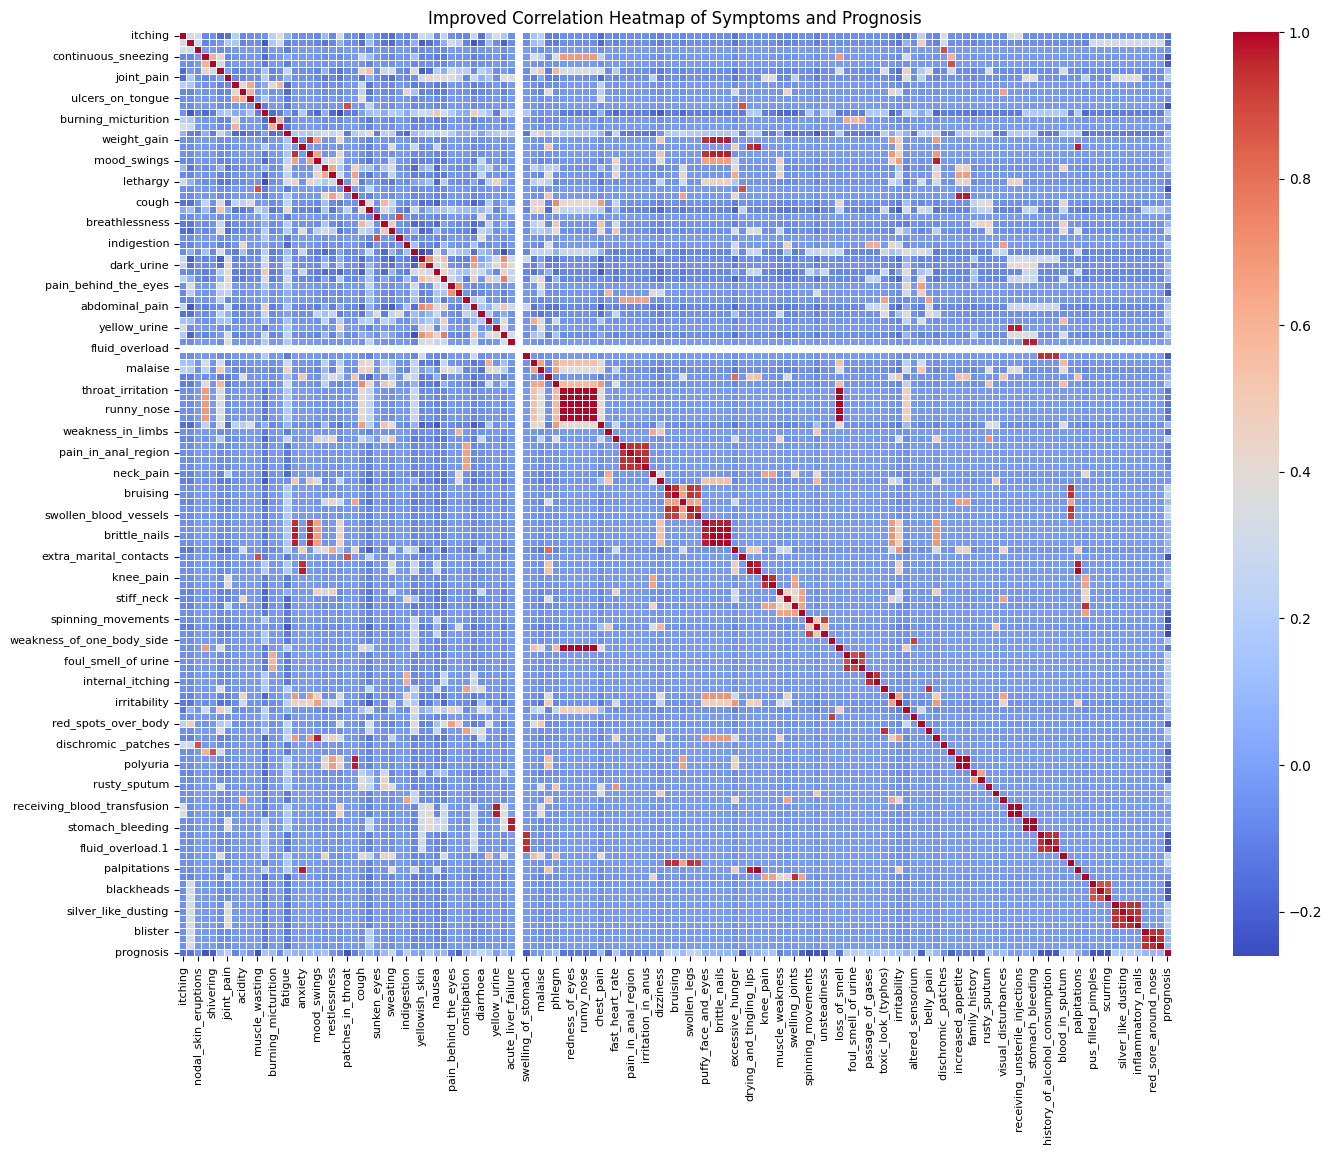

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Training.csv"  # Ensure correct path
dataset = pd.read_csv(file_path)

# Strip column names to avoid hidden spaces
dataset.columns = dataset.columns.str.strip()

# Convert 'prognosis' to numerical codes
if "prognosis" in dataset.columns:
    dataset["prognosis"] = dataset["prognosis"].astype("category").cat.codes

    # Compute correlation matrix
    corr_matrix = dataset.corr()

    # Create a mask to avoid duplicate heatmap values
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(16, 12))
    heatmap = sns.heatmap(dataset.corr(), annot=False, cmap="coolwarm", linewidths=0.5)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.title("Improved Correlation Heatmap of Symptoms and Prognosis")
    plt.show()
else:
    print("Error: 'prognosis' column not found in dataset.")

